# Logistic Rregression 
In logistic regression, the output of the model is a probability value between 0 and 1, which represents the likelihood of the input belonging to one of the classes. The output is then compared to a threshold value, typically 0.5, to make the final prediction.

The logistic regression model is trained on a labeled dataset, which means that the true outcome is known for each input. The algorithm uses the training data to estimate the parameters of the model, which are the coefficients of the independent variables.

![Alt text](logistic-regression-in-machine-learning.png) 


There are different types of logistic regression models, such as binary logistic regression, multi-class logistic regression, and ordinal logistic regression, depending on the type of outcome variable.

Logistic regression is widely used in various fields, including healthcare, marketing, finance, and social sciences, for tasks such as predicting the likelihood of a patient having a disease, classifying customers into different segments, detecting fraud in financial transactions, and predicting voting behavior.

We will use penguin dataset to illustrate. 

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline 
import pingouin as pg

In [24]:
penguin = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/Logistic-Regression/penguins_size.csv')

penguin['sex'] = penguin['sex'].map({'MALE':1,'FEMALE':0})

penguin_new = penguin.loc[penguin["sex"] != "."]
penguin_clean=penguin_new.dropna(how='any',axis=0)
penguin_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0.0


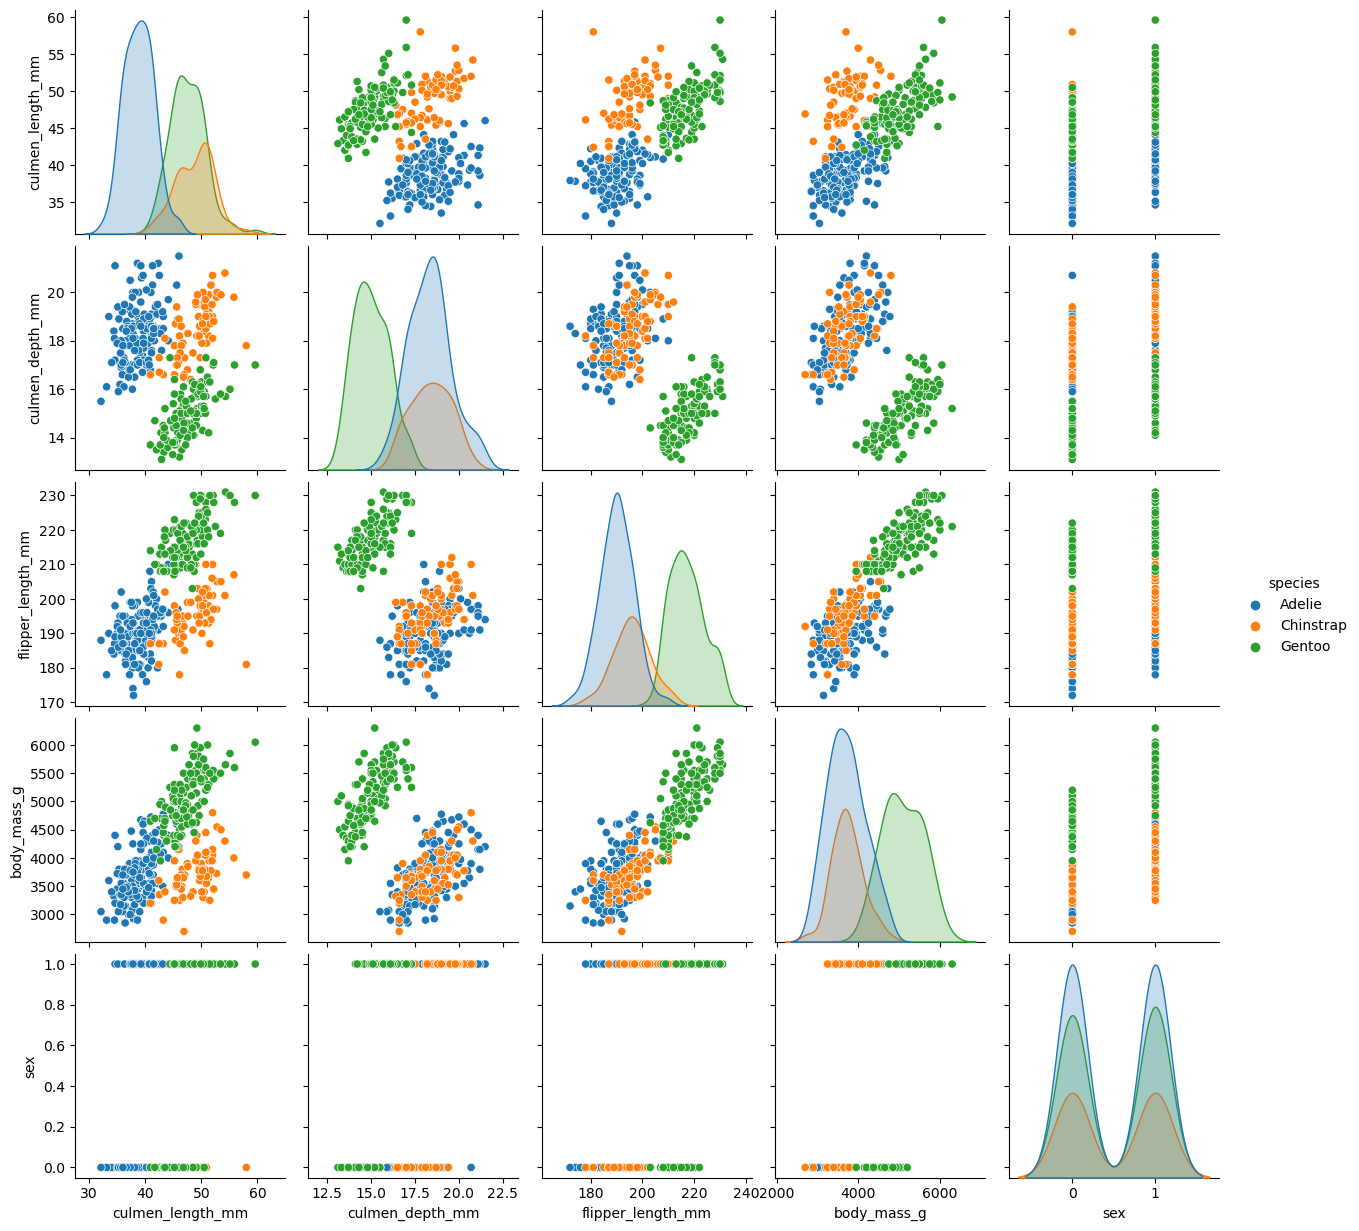

In [25]:
sns.pairplot(penguin_clean, hue = 'species')

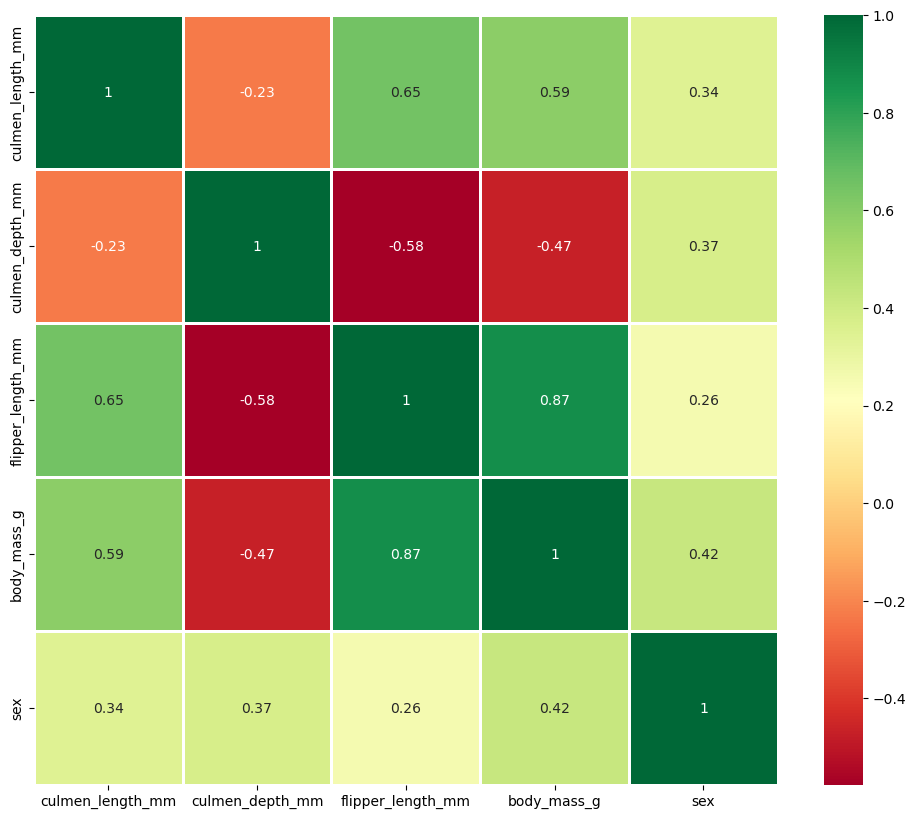

In [26]:
plt.figure(figsize=(12,10)) 
sns.heatmap(penguin_clean.corr(), annot=True, cmap='RdYlGn', linewidths = 2)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = penguin_clean[['body_mass_g', 'culmen_depth_mm',"culmen_length_mm", 'flipper_length_mm']]
y = penguin_clean['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
LR = LogisticRegression()
LR.fit(X_train, y_train)

pred = LR.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, pred))

Accuracy :  0.7761194029850746


All continuous features could make prediction with a acceptable accuracy rate. 